In [4]:
import glob
import os
import sys
from itertools import cycle
from pathlib import Path, PureWindowsPath

import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tifffile
import skimage
import pandas as pd
from skimage.filters import threshold_li
from tqdm.notebook import tqdm, trange
from skimage import exposure, io
from joblib import Parallel, delayed
import napari

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
data_dir = r'Y:\coskun-lab\Zhou\4_HCR\2D_analyses_pipelines\subcellular_clustering'

# Extract data directory info

In [34]:
def get_info(img_folder):
    """Function returns the info from folder containing multi-cycle staigning on cell

    Args:
        img_folder (str) : imgage folder path to get information
        name_dict (dict) : three level dictionnary mapping cycle -> channel -> marker name

    Returns:
        pandas dataframe with information
    """
    images_path = []
    markers = []
    fovs = []
    cycles = []
    cell_types = []
    
    # Loop through image folder
    for (dirpath, dirnames, filenames) in os.walk(img_folder):
        for name in sorted(filenames):
            if "tif" in name and 'Mask' not in name:
                # Get information from image name
                marker = name.split('_')[1:4]
                path = os.path.join(dirpath, name)
                fov = dirpath.split('_')[-1]
                cycle = name.split('_')[0][-1]
                cell_type = dirpath.split('\\')[-1].split('_')[0]

                markers.append(marker)
                images_path.append(path)
                fovs.append(fov)
                cycles.append(cycle)
                cell_types.append(cell_type)
    info = {
        "Marker": markers,
        "Path": images_path,
        "FOV": fovs,
        "Cycle": cycles,
        "Cell Type": cell_types
    }
    df = pd.DataFrame(info)

    return df

def get_masks_info(img_folder):
    """Function returns the info from folder containing multi-cycle staigning on cell

    Args:
        img_folder (str) : imgage folder path to get information
        name_dict (dict) : three level dictionnary mapping cycle -> channel -> marker name

    Returns:
        pandas dataframe with information
    """
    images_path = []
    fovs = []
    cell_types = []
    cell_ids = []
    
    # Loop through image folder
    for (dirpath, dirnames, filenames) in os.walk(img_folder):
        for name in sorted(filenames):
            if "tif" in name and 'Mask' in name:
                # Get information from image name
                path = os.path.join(dirpath, name)
                fov = dirpath.split('_')[-1]
                cell_type = dirpath.split('\\')[-1].split('_')[0]
                cell_id = name.split('_')[0][-1] 

                images_path.append(path)
                fovs.append(fov)
                cell_types.append(cell_type)
                cell_ids.append(cell_id)
    info = {
        "Path": images_path,
        "FOV": fovs,
        "Cell Type": cell_types,
        "Cell Id": cell_ids
    }
    df = pd.DataFrame(info)

    return df

In [35]:
df = get_info(data_dir)

In [36]:
df.head()

Marker                                               Path  \
0    [gapdh, empty, actb]  Y:\coskun-lab\Zhou\4_HCR\2D_analyses_pipelines...   
1       [il8, il6, ccl11]  Y:\coskun-lab\Zhou\4_HCR\2D_analyses_pipelines...   
2  [empty, col1a1, nanog]  Y:\coskun-lab\Zhou\4_HCR\2D_analyses_pipelines...   
3      [sox9, eef2, spp1]  Y:\coskun-lab\Zhou\4_HCR\2D_analyses_pipelines...   
4    [empty, runx1, pdl1]  Y:\coskun-lab\Zhou\4_HCR\2D_analyses_pipelines...   

   FOV Cycle Cell Type  
0  078     1        bm  
1  078     2        bm  
2  078     3        bm  
3  078     4        bm  
4  078     5        bm

In [37]:
df_mask = get_masks_info(data_dir)

In [38]:
df_mask.head()

Path  FOV Cell Type Cell Id
0  Y:\coskun-lab\Zhou\4_HCR\2D_analyses_pipelines...  078        bm       1
1  Y:\coskun-lab\Zhou\4_HCR\2D_analyses_pipelines...  078        bm       2
2  Y:\coskun-lab\Zhou\4_HCR\2D_analyses_pipelines...  078        bm       3
3  Y:\coskun-lab\Zhou\4_HCR\2D_analyses_pipelines...  081        bm       1
4  Y:\coskun-lab\Zhou\4_HCR\2D_analyses_pipelines...  081        bm       2

# Create merged mask

In [ ]:
from joblib import Parallel, delayed

def read_img(path):
    img = skimage.io.imread(path)
    if len(img.shape) > 2:
        img = img[0, ...]
    return img 

def joblib_loop(task, pics):
    return Parallel(n_jobs=20)(delayed(task)(i) for i in pics)

In [69]:
# group = df_mask.groupby(['Cell Type', 'FOV'])

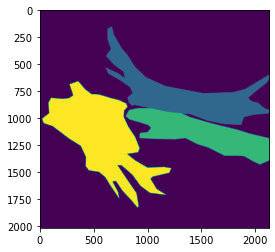

C:\Users\thu71\AppData\Local\Temp/ipykernel_8608/2166791643.py:21: UserWarning: \\bme-retromaster.ad.gatech.edu\labs5\coskun-lab\Thomas\HCR_subcellular_clustering\data\masks\bm_078.tiff is a low contrast image
  skimage.io.imsave(path, mask)


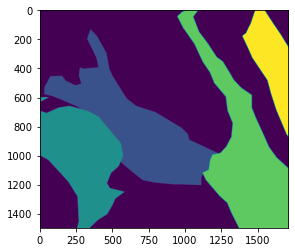

C:\Users\thu71\AppData\Local\Temp/ipykernel_8608/2166791643.py:21: UserWarning: \\bme-retromaster.ad.gatech.edu\labs5\coskun-lab\Thomas\HCR_subcellular_clustering\data\masks\bm_081.tiff is a low contrast image
  skimage.io.imsave(path, mask)


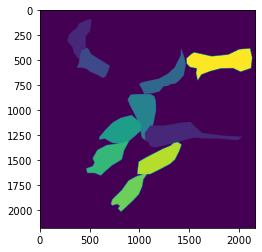

C:\Users\thu71\AppData\Local\Temp/ipykernel_8608/2166791643.py:21: UserWarning: \\bme-retromaster.ad.gatech.edu\labs5\coskun-lab\Thomas\HCR_subcellular_clustering\data\masks\hch_003.tiff is a low contrast image
  skimage.io.imsave(path, mask)


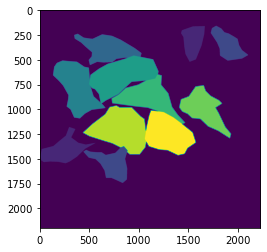

C:\Users\thu71\AppData\Local\Temp/ipykernel_8608/2166791643.py:21: UserWarning: \\bme-retromaster.ad.gatech.edu\labs5\coskun-lab\Thomas\HCR_subcellular_clustering\data\masks\hch_010.tiff is a low contrast image
  skimage.io.imsave(path, mask)


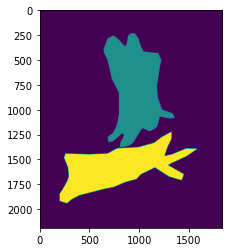

C:\Users\thu71\AppData\Local\Temp/ipykernel_8608/2166791643.py:21: UserWarning: \\bme-retromaster.ad.gatech.edu\labs5\coskun-lab\Thomas\HCR_subcellular_clustering\data\masks\uc_023.tiff is a low contrast image
  skimage.io.imsave(path, mask)


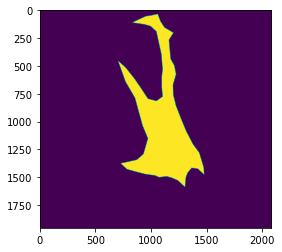

C:\Users\thu71\AppData\Local\Temp/ipykernel_8608/2166791643.py:21: UserWarning: \\bme-retromaster.ad.gatech.edu\labs5\coskun-lab\Thomas\HCR_subcellular_clustering\data\masks\uc_035.tiff is a low contrast image
  skimage.io.imsave(path, mask)


In [79]:
# for name, df_group in group:
#     paths = df_group.Path.tolist()
#     cell_ids = df_group['Cell Id'].tolist()
    
#     # Read all mask images
#     imgs = joblib_loop(read_img, paths)
    
#     # Define combined mask
#     mask = np.zeros(imgs[0].shape, dtype=np.uint8)
    
#     # Loop per cell mask ID
#     for ii, cell_id in enumerate(cell_ids):
#         mask = np.where(imgs[ii]>0, int(cell_id), mask)
        
#     # Plot mask
#     plt.imshow(mask)
#     plt.show()
    
#     # Save mask
#     path = Path.cwd().parent / 'data' / 'masks' / f'{name[0]}_{name[1]}.tiff'
#     skimage.io.imsave(path, mask)


# Read pixel level info

In [132]:
from joblib import Parallel, delayed
from skimage import exposure, io

def contrast_streching(img, n_min=20, n_max=99.9):
    if len(img.shape)>2:
        img = img[0,...,1:]
    p2, p98 = np.percentile(img, (n_min, n_max))
    return exposure.rescale_intensity(
        img, in_range=(p2, p98), out_range=(0, 1)
    )

def read_img(path):
    return contrast_streching(skimage.io.imread(path))

def joblib_loop(task, pics):
    return Parallel(n_jobs=20)(delayed(task)(i) for i in pics)

In [133]:
group = df.groupby(['Cell Type', 'FOV'])

In [140]:
name

('bm', '078')

In [162]:
df_appended = []

for name, df_group in group:
    paths = df_group.Path.tolist()
    markers = df_group['Marker'].tolist()
    
    # Read all mask images
    imgs = joblib_loop(read_img, paths)
    
    # Get imgs and markers flatten
    imgs_flatten = []
    markers_flatten = []
    for ii, marker_list in enumerate(markers):
        for jj, marker in enumerate(marker_list):
            if marker == 'empty':
                continue
            img = contrast_streching(imgs[ii][...,jj])
            imgs_flatten.append(img)
            markers_flatten.append(marker)
    
    # Get all intensity mask
    imgs_stack = np.stack(imgs_flatten)
    mask_intensity = (imgs_stack < 0.3).all(0)
    
    # Get Cell masks
    path = Path.cwd().parent / 'data' / 'masks' / f'{name[0]}_{name[1]}.tiff'
    mask_cell = skimage.io.imread(path)
    
    for cell_id in np.unique(mask_cell):
        if cell_id == 0:
            continue
        
        # Get combined mask
        mask_combined = cv2.bitwise_and(~mask_intensity.astype(int), (mask_cell==cell_id).astype(int))

        # Get pixel intensity
        rows, cols = np.where(mask_combined)
        cell_pixels = imgs_stack[:, rows, cols]

        # Create dataframe
        df_pixels = pd.DataFrame(cell_pixels.T, columns=markers_flatten)
        df_pixels["Cell Type"] = name[0]
        df_pixels["FOV"] = name[1]
        df_pixels["X"] = rows
        df_pixels["Y"] = cols
        df_pixels["Id"] = cell_id
        df_appended.append(df_pixels)


In [170]:
df_pixels = pd.concat(df_appended, ignore_index=True)

In [171]:
df_pixels

gapdh      actb       il8       il6     ccl11    col1a1     nanog  \
0        0.000000  0.000000  0.000000  0.434159  0.000000  0.000000  0.000000   
1        0.007665  0.000000  0.259067  0.310300  0.073579  0.005240  0.000000   
2        0.006676  0.001078  0.413027  0.017601  0.000000  0.017420  0.000000   
3        0.022748  0.002561  0.405625  0.089961  0.000000  0.000000  0.000000   
4        0.041292  0.000000  0.345670  0.000000  0.000000  0.006090  0.000000   
...           ...       ...       ...       ...       ...       ...       ...   
3787119  0.039299  0.006544  0.097046  0.040503  0.000000  0.010634  0.315862   
3787120  0.050249  0.000000  0.314346  0.000000  0.051908  0.004908  0.499310   
3787121  0.026159  0.002045  0.124473  0.000000  0.025482  0.006135  0.336552   
3787122  0.014600  0.013906  0.075949  0.000000  0.070784  0.006544  0.322759   
3787123  0.020684  0.000000  0.166667  0.018855  0.017932  0.007771  0.332414   

             sox9      eef2      spp1  ...       WGA  Cell Type  FOV     X  \
0        0.000000  0.002801  0.000000  ...  0.007044         bm  078   153   
1        0.000000  0.000000  0.000000  ...  0.014232         bm  078   154   
2        0.007618  0.005155  0.009117  ...  0.022714         bm  078   155   
3        0.002918  0.000000  0.000000  ...  0.009919         bm  078   156   
4        0.000000  0.001345  0.000000  ...  0.010782         bm  078   157   
...           ...       ...       ...  ...       ...        ...  ...   ...   
3787119  0.005411  0.000000  0.041063  ...  0.000000         uc  035  1578   
3787120  0.038859  0.012443  0.013688  ...  0.003444         uc  035  1580   
3787121  0.030497  0.000000  0.004026  ...  0.000000         uc  035  1581   
3787122  0.023119  0.000000  0.012077  ...  0.000000         uc  035  1581   
3787123  0.014757  0.003274  0.029791  ...  0.000000         uc  035  1584   

            Y Id col5a2  malat1  cxcr4  mki67  
0         664  1    NaN     NaN    NaN    NaN  
1         661  1    NaN     NaN    NaN    NaN  
2         657  1    NaN     NaN    NaN    NaN  
3         663  1    NaN     NaN    NaN    NaN  
4         662  1    NaN     NaN    NaN    NaN  
...       ... ..    ...     ...    ...    ...  
3787119  1299  1    NaN     NaN    NaN    NaN  
3787120  1299  1    NaN     NaN    NaN    NaN  
3787121  1294  1    NaN     NaN    NaN    NaN  
3787122  1297  1    NaN     NaN    NaN    NaN  
3787123  1297  1    NaN     NaN    NaN    NaN  

[3787124 rows x 24 columns]

In [173]:
path = Path.cwd().parent / 'data' / 'meta' / 'pixels.csv'
df_pixels.to_csv(path, index=False)